# Project Name: Salary Prediction From Scratch To Deployment


## Part 3 : Exploratory Data Analysis

In [1]:
## Import Vusulaization Libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Glassdoor_cleaned.csv')
df.head(2)

,Headquarter,Size,Founded,Type,Industry,Revenue,Employer,Job_Title,Basic_Pay,Avg_Pay,Rating,Positive,Negative,Neutral,Online,Campus,Refferal,City,Monthly
0,New York,1001 to 5000 Employees,21.0,Private,Consulting,$100 to $500 million (USD),Fractal,Data Scientist,1596545.0,1675000.0,4.0,72.0,19.0,9.0,48.0,20.0,15.0,Mumbai,No
1,India,1001 to 5000 Employees,42.0,Private,Real Estate,$10+ billion (USD),Housing.com,Data Scientist,2320161.0,2320161.0,4.2,54.0,25.0,21.0,31.0,31.0,15.0,Mumbai,No


In [3]:
df.describe()

,Founded,Basic_Pay,Avg_Pay,Rating,Positive,Negative,Neutral,Online,Campus,Refferal
count,714.000000,7.140000e+02,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,39.449580,1.158198e+06,1.142504e+06,3.862132,63.946454,25.777293,20.723147,42.942368,21.658188,13.633166
std,48.461212,1.024792e+06,9.176172e+05,0.403069,14.512316,19.395020,13.066575,12.683042,6.053931,3.952144
min,1.000000,1.022200e+04,1.022200e+04,2.200000,13.000000,3.000000,3.000000,11.000000,7.000000,4.000000
25%,9.000000,4.532731e+05,4.532731e+05,3.600000,56.000000,13.000000,15.000000,34.000000,18.000000,11.000000
50%,22.000000,9.879825e+05,1.008918e+06,3.800000,64.000000,19.000000,19.000000,42.942368,21.658188,13.633166
75%,44.000000,1.559598e+06,1.536992e+06,4.100000,70.000000,31.750000,21.000000,49.000000,25.000000,15.000000
max,351.000000,1.098825e+07,7.392810e+06,5.000000,100.000000,100.000000,100.000000,100.000000,40.000000,25.000000


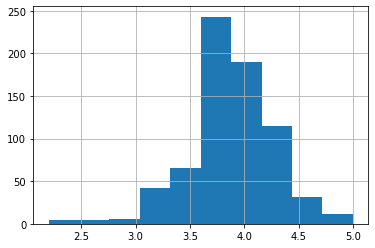

In [4]:
df.Rating.hist()

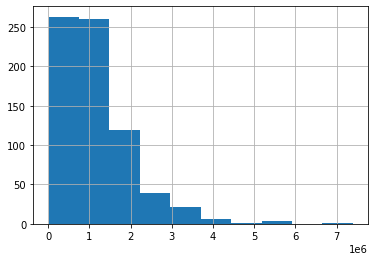

In [5]:
df.Avg_Pay.hist()

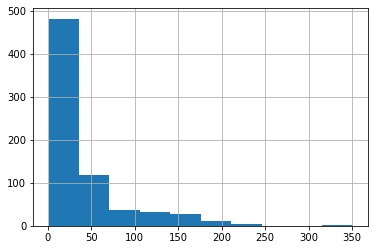

In [6]:
df.Founded.hist()

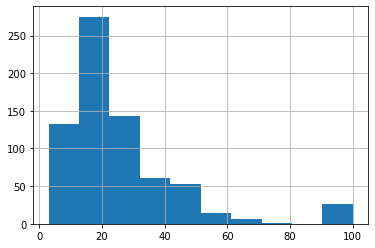

In [7]:
df.Negative.hist()

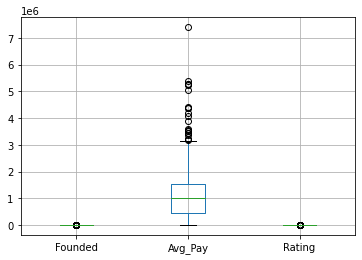

In [8]:
df.boxplot(column = ['Founded','Avg_Pay','Rating'])

In [9]:
df[['Founded','Avg_Pay','Rating','Basic_Pay',"Positive","Campus"]].corr()

,Founded,Avg_Pay,Rating,Basic_Pay,Positive,Campus
Founded,1.000000,0.068657,-0.036689,0.044193,0.087553,-0.041950
Avg_Pay,0.068657,1.000000,0.041524,0.881835,-0.048073,0.060947
Rating,-0.036689,0.041524,1.000000,0.002342,0.154129,0.054656
Basic_Pay,0.044193,0.881835,0.002342,1.000000,-0.069798,0.049892
Positive,0.087553,-0.048073,0.154129,-0.069798,1.000000,0.023036
Campus,-0.041950,0.060947,0.054656,0.049892,0.023036,1.000000


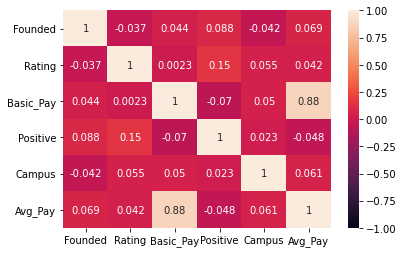

In [24]:
sns.heatmap(df[['Founded','Rating','Basic_Pay',"Positive","Campus","Avg_Pay"]].corr(),annot=True,vmax=1.0,vmin=-1.0)

graph for Headquarter: total = 51


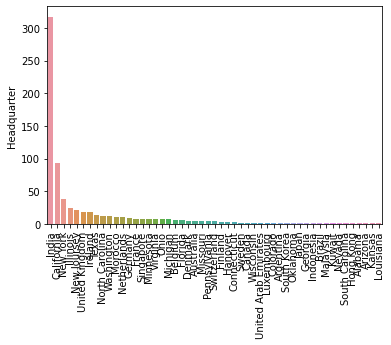

graph for Size: total = 7


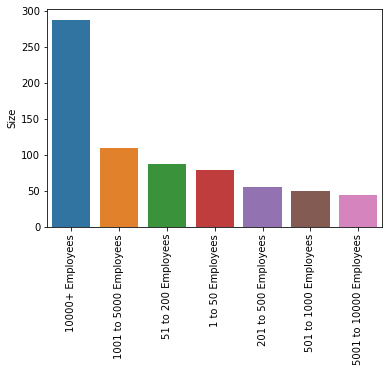

graph for Type: total = 2


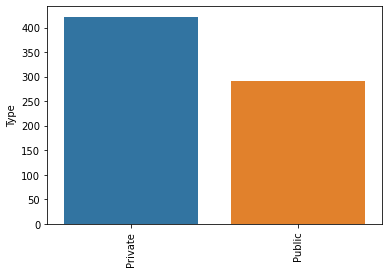

graph for Industry: total = 14


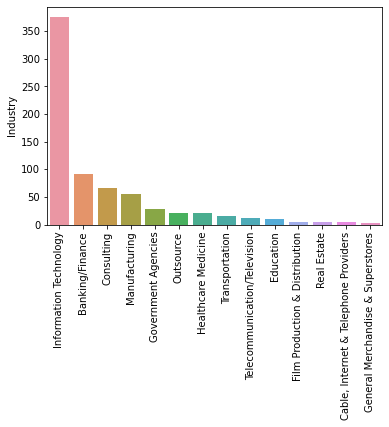

graph for City: total = 3


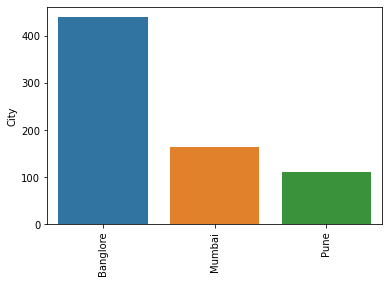

In [11]:
df_cat=df[["Headquarter","Size","Type","Industry","City"]]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

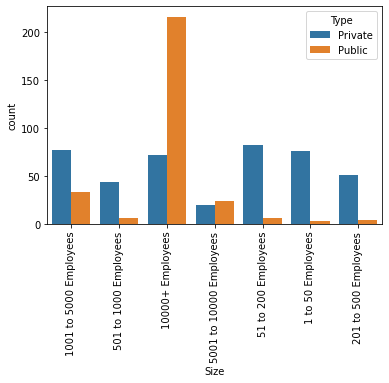

In [12]:
sns.countplot(df.Size,hue=df.Type)
plt.xticks(rotation=90)

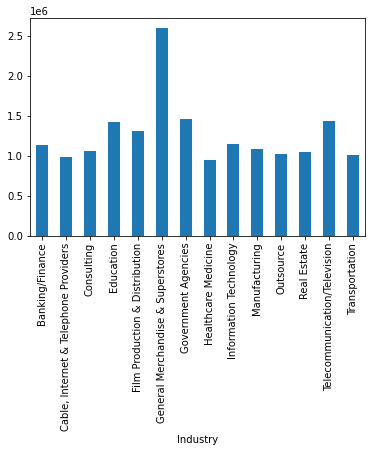

In [13]:
df.groupby(["Industry"])["Avg_Pay"].mean().plot(kind="bar")

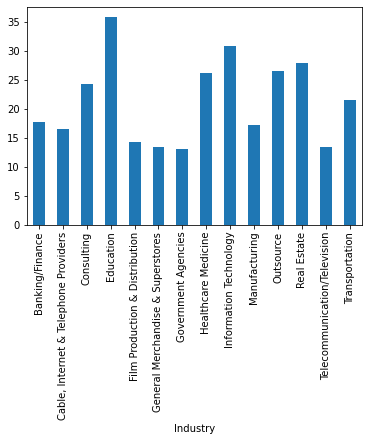

In [14]:
df.groupby(["Industry"])["Negative"].mean().plot(kind="bar")

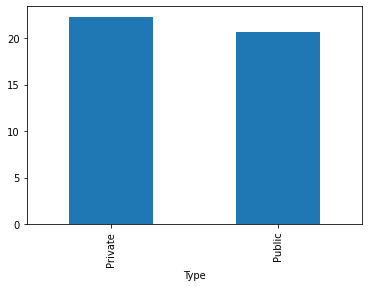

In [15]:
df.groupby(["Type"])["Campus"].mean().plot(kind="bar")

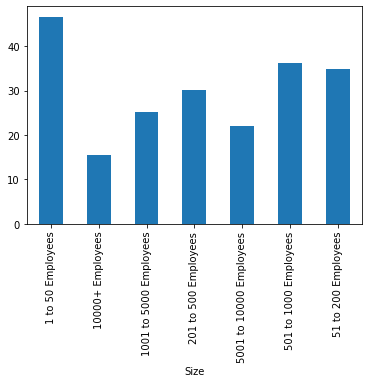

In [16]:
df.groupby(["Size"])["Negative"].mean().plot(kind="bar")

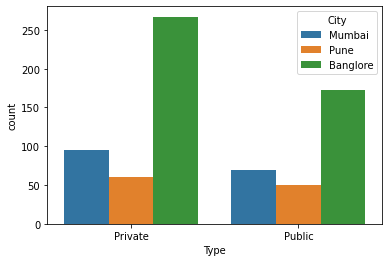

In [17]:
sns.countplot(df.Type,hue=df.City)

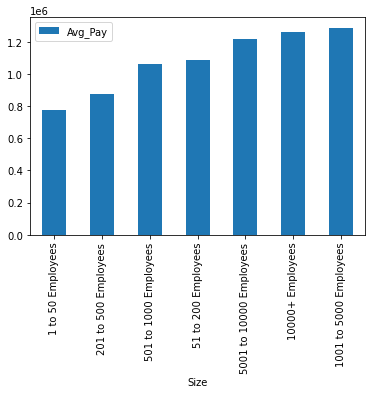

In [18]:
pd.pivot_table(df, index = 'Size', values = 'Avg_Pay').sort_values("Avg_Pay").plot(kind="bar")

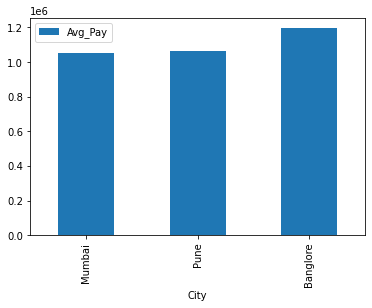

In [19]:
pd.pivot_table(df, index = 'City', values = 'Avg_Pay').sort_values("Avg_Pay").plot(kind="bar")

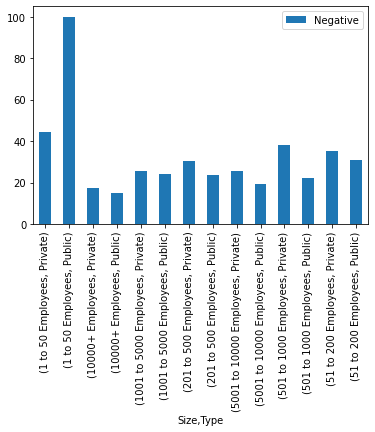

In [20]:
pd.pivot_table(df, index =['Size',"Type"], values = 'Negative').plot(kind="bar")

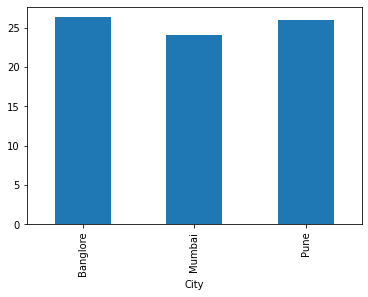

In [21]:
df.groupby("City")["Negative"].mean().plot(kind="bar")


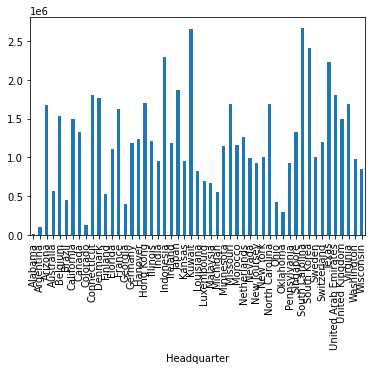

In [22]:
df.groupby("Headquarter")["Avg_Pay"].mean().plot(kind="bar")

In [23]:
df.to_csv("Glassdorr_EDA.csv",index=False)